Системы аналитических вычислений.

Лабораторная работа №2.

<h1>Задание 1, вариант Б - метод прямоугольников и метод трапеций</h1>

1. Реализовать функции для метода прямоугольников и метода трапеций.
2. Сделать ползунок для перебора значений входных параметров.
3. Сделать вывод кадров нахождения решения и оформить их через массив графиков.
4. Сравнить полученный результат с функцией numerical_integral().

Функция:

In [2]:
y(x) = (ln(x-2)+1)/(x-2)
show(y)

x |--> (log(x - 2) + 1)/(x - 2)

График функции:

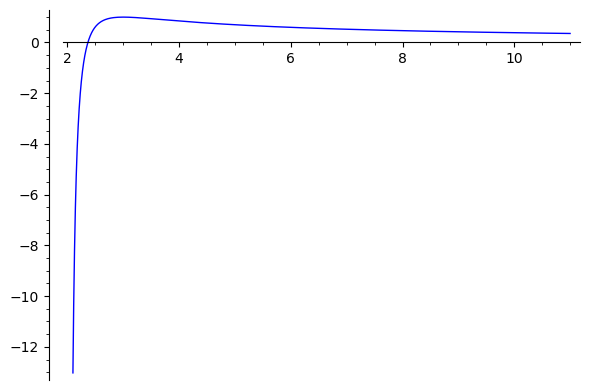

In [3]:
plot(y, (2.1, 11))

<h1>Метод прямоугольников</h1>

In [4]:
import numpy as np
def rectangle(func, left, right, step, vis = True):
    res = []
    plots = plot(func, (left, right))
    res.append(plots)
    rectangles = []
    s = 0
    
    for i, x0 in enumerate(np.arange(left, right-step/2, step)):
        fy = func(x0)
        cur = fy * step
        s += cur

        rectangles.append(line(matrix([
            [x0 + step, 0],
            [x0 + step, fy],
            [x0, fy],
            [x0, 0]
        ]), color = 'red'))
        txt = text(r"$step={}, current={}, result={}$".format(i+1, str(cur)[:6], str(s)[:6]), (left+2, -1), fontsize=10, color="black")
        plots += plot(rectangles[-1])
        res.append(plots+txt)
    if vis:
        graphics_array(res, len(res)//2+1, 2).show(figsize=[15, 15], aspect_ratio = 1, ymin=0, ymax=1.5)
    return s

Ползунки и визуализация метода:

In [5]:
@interact
def _(step = (0.1, 1, 0.1)): #шаг функции
    @interact
    def _(a=(3, 10, step)):
        @interact
        def _(b=(a + step, 20, step)):
            rectangle(y, a, b, step)

Interactive function <function _ at 0x6ffee30ccdd0> with 1 widget
  step: FloatSlider(value=0.5, description='…

Сравнение результата, полученного методом прямоугольников, и результат вычисления интеграла

In [6]:
x1 = 3
x2 = 6
value, err = numerical_integral(y, x1, x2)
rect = rectangle(y, x1, x2, 0.1, False)
print('Value =', value)
print('Rectangle =', rect)
dif = abs(value - rect)
print('Difference =', dif)

Value = 2.3472003889562933
Rectangle = 2.3673001978277664
Difference = 0.020099808871473


Погрешность метода незначительна и будет меняться прямопропорционально изменению шага функции

<h1>Метод трапеций</h1>

In [7]:
def trapeze(func, left, right, step, vis = True):
    res = []
    res.append(plot(func, (left, right)))
    plots = plot(func, (left, right))
    trapezes = []
    s = 0
    
    for i, x0 in enumerate(np.arange(left, right-step/2, step)):
        fy1 = func(x0)
        fy2 = func(x0 + step)
        cur = ((fy1 + fy2) / 2) * step
        s += cur

        trapezes.append(line(matrix([
            [x0 + step, 0],
            [x0 + step, fy2],
            [x0, fy1],
            [x0, 0]
        ]), color = 'red'))
        txt = text(r"$step={}, current={}, result={}$".format(i+1, str(cur)[:6], str(s)[:6]), (left+2, -1), fontsize=10, color="black")
        plots += plot(trapezes[-1])
        res.append(plots+txt)
    if vis:
        graphics_array(res,len(res)//2+1,2).show(figsize=[15,15], aspect_ratio = 1, ymin=0, ymax=1.5)
    return s

Ползунки и визуализация метода:

In [8]:
@interact
def _(step = (0.1, 1, 0.1)):
    @interact
    def _(a=(3, 10, step)):
        @interact
        def _(b=(a + step, 15, step)):
            trapeze(y, a, b, step)

Interactive function <function _ at 0x6ffee1186a70> with 1 widget
  step: FloatSlider(value=0.5, description='…

Сравнение результата, полученного методом трапеций, и результат вычисления интеграла

In [9]:
tr = trapeze(y, x1, x2, 0.1, False)
print('Value =', value)
print('Rectangle =', tr)
dif = abs(value - tr)
print('Difference =', dif)

Value = 2.3472003889562933
Rectangle = 2.347128877341765
Difference = 7.151161452823018e-05


Погрешность метода незначительна и будет меняться прямопропорционально изменению шага функции

<h1>Задание 2 - НОД</h1>

1. Реализовать расширенный алгоритм Евклида.
2. Рассчитать НОД, сравнить его с результатом функции gcd().
3. Получить представление НОД в виде $u * f + v * g$ (тождество Безу).

Вариант 2:

$f = 5x^4 - 15x^3 + 15x^2 - 5x$

$g = -22x^5 + 33x^4 - 11x^3 - 99x + 99$

In [10]:
R.<x> = PolynomialRing(QQ)
f = 5*x**4 - 15*x**3 + 15*x**2 - 5*x
g = -22*x**5 + 33*x**4 - 11*x**3 - 99*x + 99

show(f)
show(g)

5*x^4 - 15*x^3 + 15*x^2 - 5*x

-22*x^5 + 33*x^4 - 11*x^3 - 99*x + 99

Расширенный алгоритм Евклида

In [11]:
def n_gcd(a, b):
    if(a == 0):
        return b, 0, 1
    
    d, x1, y1 = n_gcd(b%a, a)
    x = y1 - (b // a) * x1
    y = x1
    return d, x, y

In [12]:
res, u, v = n_gcd(f, g)
print('GCD =', res)
print('u =', u(x))
print('v =', v(x))

GCD = -6336/49*x + 6336/49
u = -352/175*x^3 - 1936/1225*x^2 + 4752/1225*x + 1584/245
v = -16/35*x^2 + 16/49*x + 64/49


Нормируем:

In [13]:
k = -49/6336

k1 = res * k
k2 = u * k
k3 = v * k

In [14]:
print('GCD =', k1)
print('u =', k2)
print('v =', k3)

GCD = x - 1
u = 7/450*x^3 + 11/900*x^2 - 3/100*x - 1/20
v = 7/1980*x^2 - 1/396*x - 1/99


Pассчитаем НОД с помощью встроенной функции gcd():

In [16]:
_auto = gcd(f, g)
show(_auto)

x - 1

Результат, полученный при помощи алгоритма Евклида, совпал с результатом, полученным с помощью функции gcd(). Следовательно НОД полиномов $f$ и $g$ равен $x-1$.

При помощи расширенного алгоритма Евклида мы нашли коэффициенты в разложении Безу. Проверим их корректность.

In [17]:
k2*f + k3*g

x - 1

Полученный результат совпал с НОД, значит найденные коэффициенты верны. Алгоритм работает корректно.